In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
X_train.shape

(8000, 11)

In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [19]:
#scaled in values
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

#model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))# Finetune
model.add(Dense(11,activation='sigmoid'))#Hidden Layer
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5125 - accuracy: 0.7955 - val_loss: 0.5068 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7956 - val_loss: 0.5071 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7958 - val_loss: 0.5067 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7958 - val_loss: 0.5055 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7958 - val_loss: 0.5067 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7958 - val_loss: 0.5039 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7958 - val_loss: 0.5028 - val_accuracy: 0.7969

In [25]:
model.layers[1].get_weights()

[array([[-0.09946914,  0.2618553 , -0.33063143, -0.17270315,  0.45127892,
          0.23475002, -0.21204443,  0.5216848 , -0.05805405,  0.02025515,
          0.10000782],
        [ 0.15677583,  0.05009103,  0.22551131, -0.23518464,  0.3088143 ,
         -0.24875686,  0.15094751, -0.22825566,  0.12575865, -0.33448648,
          0.24214077],
        [ 0.2868566 ,  0.31083602, -0.15613398,  0.12921864,  0.51319796,
          0.11426321, -0.15965872,  0.43347633, -0.5079602 ,  0.00947756,
         -0.08565428],
        [ 0.0476257 ,  0.27344126,  0.3034067 ,  0.24056882, -0.15727025,
          0.46067414, -0.06930552,  0.32134998, -0.2623728 , -0.02959567,
         -0.03886341],
        [ 0.53366464,  0.11766765, -0.0953204 ,  0.3020947 ,  0.43536156,
          0.1961442 ,  0.02133451, -0.28065735, -0.10902759, -0.17812106,
          0.11757973],
        [-0.5423952 ,  0.11357819,  0.5587519 ,  0.37223834,  0.47232026,
          0.23163311,  0.4462593 , -0.05132166,  0.25588614, -0.1691752

In [26]:
model.layers[0].get_weights()

[array([[ 0.1458504 , -0.14491126, -0.23761699,  0.4827544 , -0.2031047 ,
          0.27818993,  0.02158214, -0.20287901, -0.19595613,  0.36151573,
          0.3808387 ],
        [-0.35408777, -0.08740941, -0.1798268 , -0.04456476,  0.3580989 ,
         -0.1876263 ,  0.5049489 ,  0.27877998,  0.3545165 ,  0.24181361,
          0.24004385],
        [-0.37365162, -0.47782084, -0.68082374,  0.03237375, -0.45621544,
          0.27362984,  0.37925893, -0.06808072, -0.27439308, -0.241575  ,
         -0.19300658],
        [ 0.22322145, -0.04295209,  0.16684285, -0.19546023, -0.15460414,
          0.3428368 ,  0.12300079, -0.20316663,  0.16043927, -0.05902648,
         -0.13968968],
        [-0.42883572,  0.2769457 , -0.46558627, -0.06724797,  0.34712976,
          0.51722693,  0.22715336,  0.2569977 , -0.47734454, -0.33570457,
          0.06368354],
        [-0.50525934, -0.20470956, -0.36765262, -0.38501126,  0.21582772,
          0.63471645,  0.00511773,  0.14301783,  0.4309804 , -0.4221042

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([[0.19788715],
       [0.19788715],
       [0.19788715],
       ...,
       [0.19788715],
       [0.25210178],
       [0.19788715]], dtype=float32)

In [29]:
y_pred = y_pred.argmax(axis=-1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

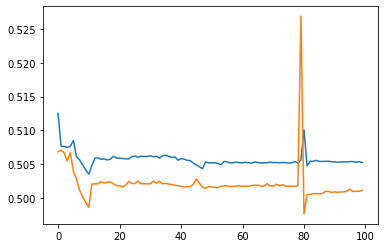

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

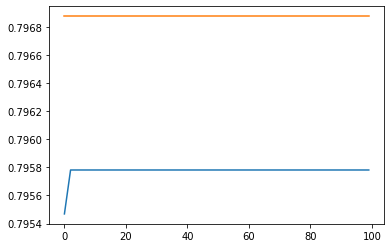

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])